# Retificador controlado de meia onda (Carga R/L/E)

<center>
<img width="400" height="500" src="Figuras/13_controlado_meia_onda_rle.png">
</center>

In [1]:
from funcoes import *
%run funcoes.py
%matplotlib inline

# - Tensão na carga - # 
Vpk:	 169.7056274847714 
Vm: 	 104.37597803409685 
Vrms: 	 111.61045093332183
# - Corrente na carga - # 
Ipk: 	 8.979754690147852 
Im: 	 2.187989013070721 
Irms: 	 3.9005149550292093
# - Potências - # 
Ppk:	 1236.207368525588 
P: 	 249.2269351330905 
S: 	 468.0617946035051
# - Fatores - # 
FP:	 0.5324658795196273 
THD V:	 5.249067250782661 
THD I:	 1.063959712393992


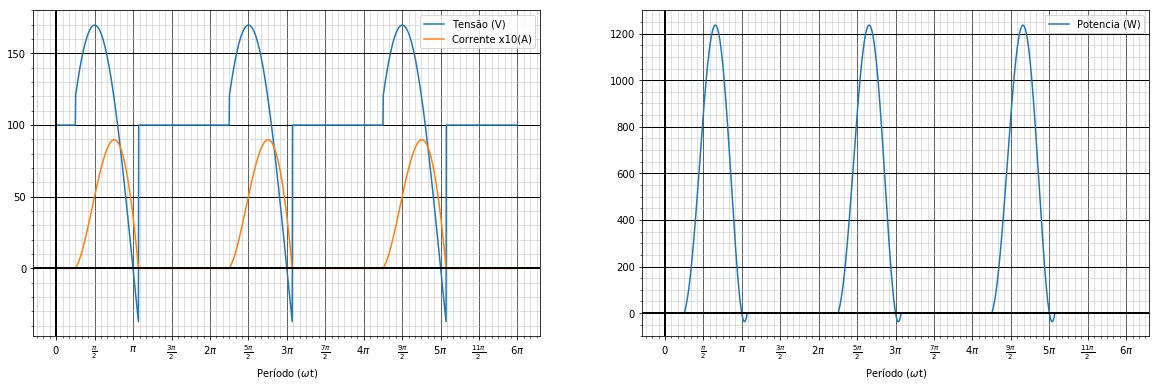

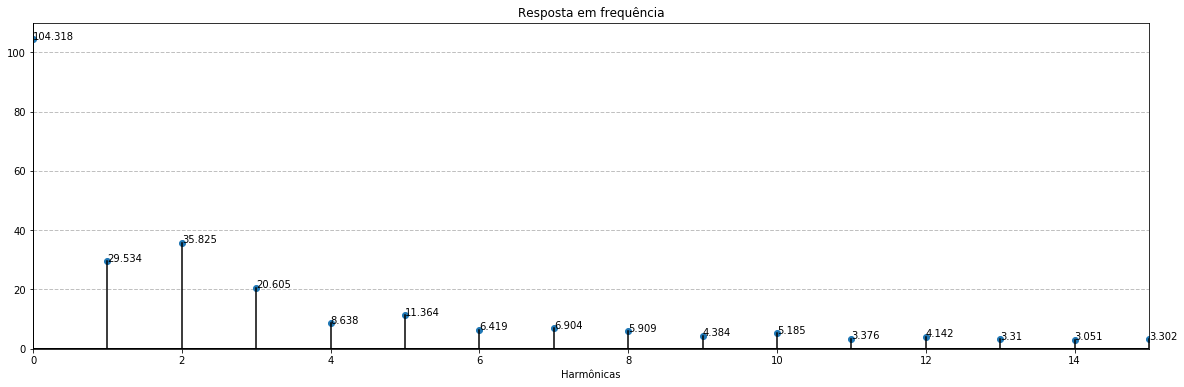

In [2]:
############# RETIFICADOR MEIA ONDA #############
################### CARGA R/L ###################

V_pk = 120*sqrt(2)
Freq = 60
R = 2
L = 0.02
E = 100
T = 2*pi

w = 2*pi*Freq

XL = w * L
XRL = complex(R,XL)

Z = abs(XRL)
teta = cm.phase(XRL)
#(r, phi) = polar(z)
tal = L/R

a = 45*(2*pi/360)

a_min = asin(E/V_pk)

if a_min > a:
    a = a_min

A = ((-V_pk/Z)*sin(a - teta) + (E/R))*exp(a/(w*tal))

ab = calculo_ab(f'(({V_pk}/{Z})*sin(x - {teta}) - ({E}/{R}) + {A}*exp((-x)/({w}*{tal})))', pi, 'scipy')
b = ab[0]

func_v = f'{E} + ({V_pk}*sin(x) - {E})*( heaviside(x - {a}, 0) - heaviside(x - {b}, 0) + {eps} )'
V_media = calculo_medio(func_v)
V_rms = calculo_rms(func_v)

func_i = f'(({V_pk}/{Z})*sin(x - {teta}) - ({E}/{R}) + {A}*exp((-x)/({w}*{tal})))*( heaviside(x - {a}, 0) - heaviside(x - {b}, 0) + {eps} )'
I_media = calculo_medio(func_i)
I_rms = calculo_rms(func_i)
I_pk = calculo_pk(func_i)

func_p = '(' + func_v + ')*(' + func_i + ')'
P = calculo_medio(func_p)
S = I_rms*(V_pk/sqrt(2))
Q = sqrt(S**2 - P**2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_v, T)
thdI = calculo_thd(func_i, T)

print("# - Tensão na carga - #"   , "\nVpk:\t"  , V_pk, "\nVm: \t"  , V_media, "\nVrms: \t", V_rms)
print("# - Corrente na carga - #" , "\nIpk: \t" , I_pk, "\nIm: \t"  , I_media, "\nIrms: \t", I_rms)
print("# - Potências - #"         , "\nPpk:\t"  , P_pk, "\nP: \t"   , P      , "\nS: \t"   , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP  , "\nTHD V:\t", thdV   , "\nTHD I:\t", thdI)

plot_info(func_v, func_i, xlim=(0, T))
fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_v, ax2, T=2*np.pi, n_harmonicas = 15)